In [1]:
from spatial_statistics_tools import *
from skimage import feature
from skimage.filters import gaussian

# specify directory
dir_ = "/Users/lukasjudith/Documents/Studium/Master Physik Heidelberg/Semester 2/01 HCI project/Code/spatial-statistical-analysis"
os.chdir(dir_)

## Load cell images and compute the K function

Filename: u373_clcagfp_clcbhalosir_con1568_tgn405_ 3.tif
Image shape: (54, 4, 512, 512)


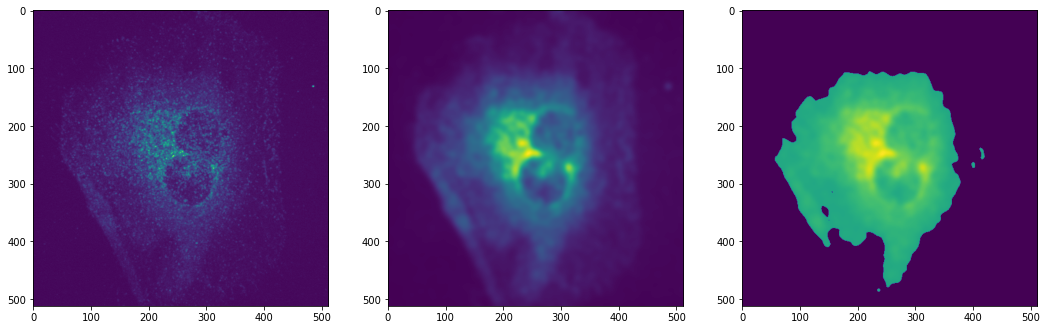

1.0000001
0.9999997
1.0000002
262144 76163.0 0.2905387878417969


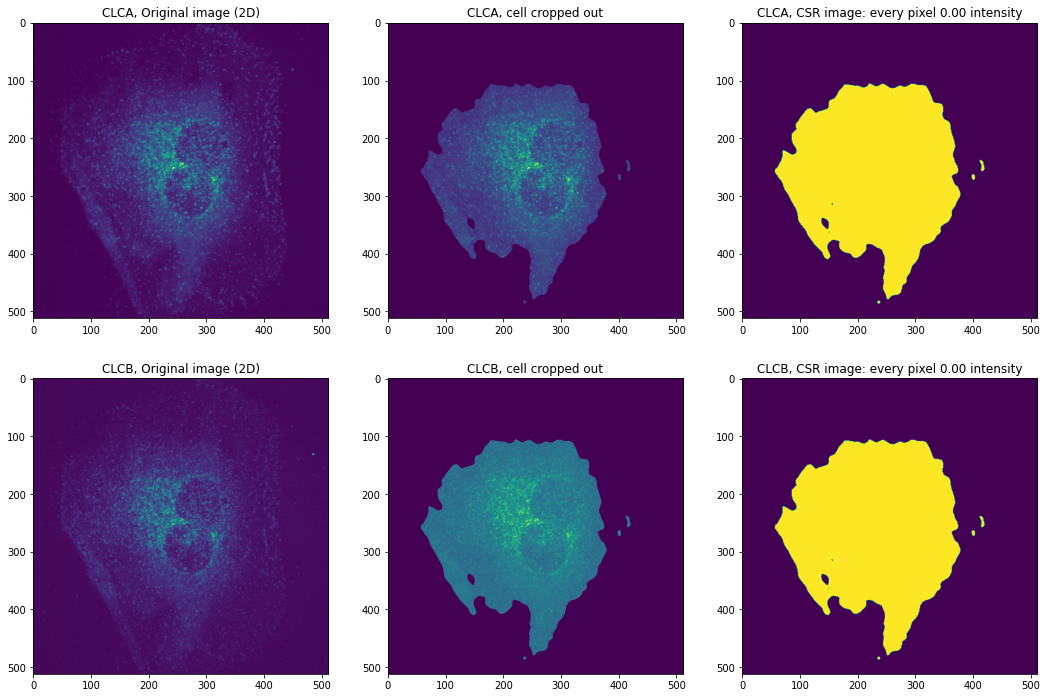

In [21]:
# name of the folder storing .tif files of cell images
folder = "CLC_Distribution_TIFFs" 
#filename = "u373_clcagfp_clcbhalosir_con1568_tgn405_ 7.tif"
filename = "u373_clcagfp_clcbhalosir_con1568_tgn405_ 3.tif"
#1,2,3,4,7,8,9

print("Filename:", filename)

name = "_significance_test"
save = True
path = "results/"+filename[:-4]+name+"_imgs.pdf"

# get array with all pixel intensities and metadata of image
im, metadata = load_image(filename) 

# choose right channel and z position in .tif file
z = 33
channel_clca = 2
channel_clcb = 0

zxy_arr_clca = im[:, channel_clca, :, :]
zxy_arr_clcb = im[:, channel_clcb, :, :]
# extract 2D slices
xy_array_clca = zxy_arr_clca[z, :, :].astype("float32")
xy_array_clcb = zxy_arr_clcb[z, :, :].astype("float32")


img_array_clca = xy_array_clca.copy()
img_array_clcb = xy_array_clcb.copy()


# params for the gaussian blur/mask
sigma = 5
offset = 20


img = gaussian(img_array_clcb,sigma=sigma)
#img = denoise_bilateral(img_array_clcb, sigma_color=100, sigma_spatial=2)
thresh = np.mean(img) + offset

img_new = img.copy()
img_new[img_new<thresh] = 0

#edges = feature.canny(img, sigma=34)

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(img_array_clcb)
ax[1].imshow(img)
#ax[2].imshow(edges)
ax[2].imshow(img_new)

if save:
    plt.savefig("results/"+filename[:-4]+"_blur_test.pdf")
plt.show()


cell_mask = (img_new > 0).astype('float32')


img_array_clca = img_array_clca * cell_mask
img_array_clcb = img_array_clcb * cell_mask

total_int_clca = np.sum(img_array_clca)
total_int_clcb = np.sum(img_array_clcb)

# scale second array to have same total 
img_array_clca = img_array_clca/total_int_clca
img_array_clcb = img_array_clcb/total_int_clcb

img_array_csr = cell_mask.copy()
n_pixels_csr = np.sum(img_array_csr>0)
total_intesity_new = np.sum(img_array_clcb)
mean_intensity_new = total_intesity_new/n_pixels_csr
img_array_csr = img_array_csr*mean_intensity_new


print(np.sum(img_array_clcb))
print(np.sum(img_array_clca))
print(np.sum(img_array_csr))


# test size-rescaling
area_img = cell_mask.shape[0] * cell_mask.shape[1]
area_cell = np.sum(cell_mask)
cell_area_ratio = area_cell/area_img
print(area_img, area_cell, cell_area_ratio)


fig, ax = plt.subplots(2,3, figsize=(18,12))
ax[0][0].imshow(xy_array_clca)#, vmin=min_intensity, vmax=max_intensity)
ax[0][0].set_title("CLCA, Original image (2D)")
ax[1][0].imshow(xy_array_clcb)#, vmin=min_intensity, vmax=max_intensity)
ax[1][0].set_title("CLCB, Original image (2D)")
ax[0][1].imshow(img_array_clca)#, vmin=min_intensity, vmax=max_intensity) 
ax[0][1].set_title(f"CLCA, cell cropped out")
ax[1][1].imshow(img_array_clcb)#, vmin=min_intensity, vmax=max_intensity) 
ax[1][1].set_title(f"CLCB, cell cropped out")
ax[0][2].imshow(img_array_csr)#, vmin=min_intensity, vmax=max_intensity)
ax[0][2].set_title(f"CLCA, CSR image: every pixel {mean_intensity_new:.2f} intensity")
ax[1][2].imshow(img_array_csr)#, vmin=min_intensity, vmax=max_intensity)
ax[1][2].set_title(f"CLCB, CSR image: every pixel {mean_intensity_new:.2f} intensity")
if save:
    plt.savefig(path)
plt.show()

In [3]:
# results when using FFT-based auto-correlation
range_of_t = np.arange(1, 600, 10)


K_values_clca = ripleys_K_fast(img_array_clca, range_of_t)#, _lambda_clca)
K_values_clcb = ripleys_K_fast(img_array_clcb, range_of_t)#, _lambda_clcb)
K_values_csr = ripleys_K_fast(img_array_csr, range_of_t)#, _lambda_csr)


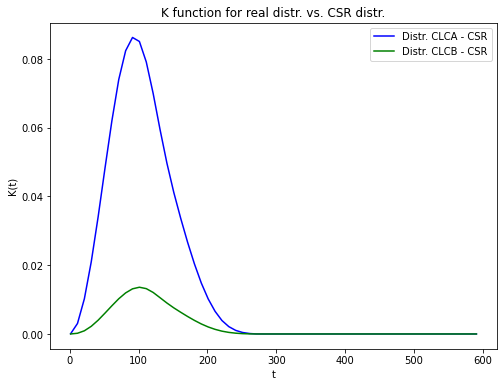

In [58]:
save = False
path = "results/"+filename[:-4]+name+"_K_func.pdf"


plt.figure(figsize=(8,6))
plt.title("K function for real distr. vs. CSR distr.")
plt.plot(range_of_t, np.array(K_values_clca) - np.array(K_values_csr), label="Distr. CLCA - CSR", color='blue')
plt.plot(range_of_t, np.array(K_values_clcb) - np.array(K_values_csr), label="Distr. CLCB - CSR", color='green')


plt.xlabel("t")
plt.ylabel("K(t)")
plt.legend()
if save:
    plt.savefig(path)
plt.show()


In [ ]:
#filename = "u373_clcbgfp_clcahalo_tgn405_con1568_1 5.tif"
#img_array_clca[:, 460:] = 0
#img_array_clca[:, :70] = 0
#img_array_clca[460:, :] = 0
#img_array_clca[:55, :] = 0
#img_array_clcb[:, 460:] = 0
#img_array_clcb[:, :70] = 0
#img_array_clcb[460:, :] = 0
#img_array_clcb[:55, :] = 0

##  Kolmogorov–Smirnov test

In [2]:
from scipy.stats import ks_2samp

Critical values:


<img src="alpha_table.png" width="500"/>

In [2]:
def eCDF(data):
    """
    Computes empirical cumulative distribution function for a given sample.
    """
    
    N = len(data)
    X = np.sort(data)
    F = np.array(range(N))/float(N)
    
    return X, F


def eCDF_bar(data, x_min=None, x_max=None, N_x=None):
    """
    Computes empirical cumulative distribution function for a given sample
    for a uniformely spaced range.
    """
    
    if x_min is None:
        x_min=np.min(data)
    if x_max is None:
        x_max=np.max(data)
    if N_x is None:
        N_x=len(data)*200
    
    x_range = np.linspace(start=x_min, stop=x_max, num=N_x)
    data_sorted = list(np.sort(data))
    F = []

    count = 0
    for x in x_range:

        if len(data_sorted) == 0:
            F.append(count)

        elif x >= data_sorted[0]:
            F.append(count)
            count += 1
            data_sorted.pop(0)

        else:
            F.append(count)

    F = np.array(F)/count

    return x_range, F


def KS_2sample_test(data1, data2, alpha, printout=False, N=None):
    """
    Kolmogorov-Smirnov test for two samples. Returns boolean to determine 
    if Null hypothesis was rejected.
    
    Null hypothesis: the samples are drawn from the same distribution.
    """

    x_min = np.min([data1, data2])*1.05
    x_max = np.max([data1, data2])*1.05
    
    if N is None:
        N = 300 * len(data1)

    # compute empirical cumulative distribution function for both samples
    X1, F1 = eCDF_bar(data1, x_min, x_max, N)
    X2, F2 = eCDF_bar(data2, x_min, x_max, N)

    if not np.array_equal(X1, X2):
        raise Exception("The two eCDF have different x ranges!")

    # test statistic for two-sample Kolmogorov-Smirnov test
    D = np.max(abs(F1-F2))

    n = len(data1)
    m = len(data2)

    c = np.sqrt(-np.log(alpha/2) * 1/2)

    # value to compare to test statistic
    D_alpha = c * np.sqrt((n+m)/(n*m))

    if D > D_alpha:
        if printout:
            print(f"H_0 rejected at level {alpha}")
        is_rejected = True
    else:
        if printout:
            print(f"H_0 not rejected at level {alpha}")
        is_rejected = False

    return is_rejected, X1, F1, F2


def find_significance_level(data1, data2, min_alpha=0.001, max_alpha=0.2, N_alpha=10):
    """
    Finds lowest critical value to not reject H0 on KS test.
    """
    
    alpha_range = np.linspace(min_alpha, max_alpha, N_alpha)
    
    for alpha in np.flip(alpha_range):
        is_rejected, _, _, _ = KS_2sample_test(data1, data2, alpha, printout=False)
        # stop at significance level where H0 cannot be rejected,
        # i.e. where distributions are similar enough.
        if not is_rejected:
            break
    return alpha 

In [3]:
data1 = np.random.normal(0,1, size=2000)
data2 = np.random.normal(0,1.1, size=2000)

#find_significance_level(data1, data2, min_alpha=0.001, max_alpha=0.3, N_alpha=10)
KS_2sample_test(data1, data2, 0.01)

(False,
 array([-3.92043266, -3.92041915, -3.92040565, ...,  4.18255182,
         4.18256532,  4.18257883]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [4]:
np.flip(np.array([1,2,3,4]))

array([4, 3, 2, 1])

In [128]:
for i in range(10):
    
    if i > 4:
        break
        
print(i)

5


In [129]:
from statsmodels.distributions.empirical_distribution import ECDF

H_0 not rejected at level 0.01


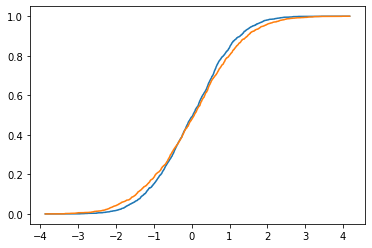

In [5]:
data1 = np.random.normal(0,1, size=2000)
data2 = np.random.normal(0,1.15, size=2000)

alpha = 0.01


#plt.plot(X1, D*np.ones(len(X1)))

is_rej, X1, F1, F2 = KS_2sample_test(data1, data2, alpha, printout=True)

plt.plot(X1, F1)
plt.plot(X1, F2)
plt.show()

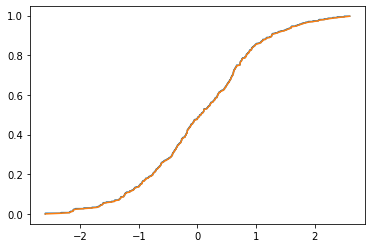

In [134]:
data = np.random.normal(0,1, size=300)


plt.plot(*eCDF_bar(data))
plt.plot(*eCDF(data))

In [130]:
x_range, data_sorted

(array([-0.24259951, -0.23425757, -0.22591564, -0.2175737 , -0.20923176,
        -0.20088983, -0.19254789, -0.18420595, -0.17586401, -0.16752208,
        -0.15918014, -0.1508382 , -0.14249627, -0.13415433, -0.12581239,
        -0.11747045, -0.10912852, -0.10078658, -0.09244464, -0.0841027 ,
        -0.07576077, -0.06741883, -0.05907689, -0.05073496, -0.04239302,
        -0.03405108, -0.02570914, -0.01736721, -0.00902527, -0.00068333,
         0.0076586 ,  0.01600054,  0.02434248,  0.03268442,  0.04102635,
         0.04936829,  0.05771023,  0.06605217,  0.0743941 ,  0.08273604,
         0.09107798,  0.09941991,  0.10776185,  0.11610379,  0.12444573,
         0.13278766,  0.1411296 ,  0.14947154,  0.15781347,  0.16615541]),
 [])

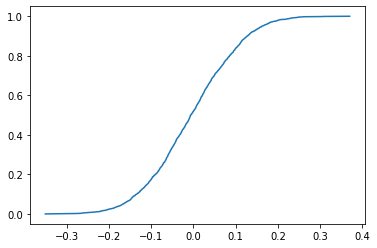

In [127]:
data = np.random.normal(0,0.1, size=2000)
plt.plot(*eCDF(data))

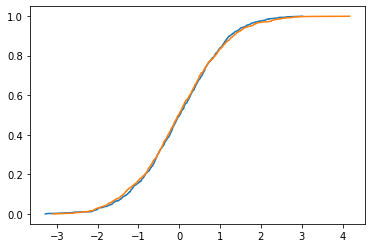

In [135]:
data1 = np.random.normal(0,1, size=1000)
data2 = np.random.normal(0,1, size=1000)
X1, F1 = eCDF(data1)
X2, F2 = eCDF(data2)
plt.plot(X1, F1)
plt.plot(X2, F2)

In [136]:
data1 = np.array([1,1,1,1,0.5,2,2,2,2,2,3,3,3,3,3,3,4,4,4,5,5,5,6,6,6,7,7,8,9,9,11])
data2 = np.array([1,1,10,10,0.5,2,2,2,2,7,8,9,9,11])

data1 = np.random.normal(0,1, size=2000000)
data2 = np.random.normal(0,1, size=2000000)

statistic, p_value = ks_2samp(data1, data2)
print("p value:", p_value)

NameError: name 'ks_2samp' is not defined

#### Apply to cell images

In [11]:
filenames = [
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 1.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 2.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 3.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 4.tif",
  #  "u373_clcagfp_clcbhalosir_con1568_tgn405_ 5.tif",
  #  "u373_clcagfp_clcbhalosir_con1568_tgn405_ 6.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 7.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 8.tif",
    "u373_clcagfp_clcbhalosir_con1568_tgn405_ 9.tif",
]

images_clca = []
images_clcb = []

folder = "CLC_Distribution_TIFFs" 
range_of_t = np.arange(1, 600, 10)

data_dict = {}
Ks_clca = []
Ks_clcb = []
Ks_csr = []
Ks_clca_diff = []
Ks_clcb_diff = []

area_ratios = []


for filename in filenames:
    
    print("Processing", filename)
    
    # name of the folder storing .tif files of cell images
    
    #filename = "u373_clcagfp_clcbhalosir_con1568_tgn405_ 7.tif"
    #filename = "u373_clcagfp_clcbhalosir_con1568_tgn405_ 2.tif"
    #print("Filename:", filename)

    # get array with all pixel intensities and metadata of image
    im, metadata = load_image(filename) 

    # choose right channel and z position in .tif file
    z = 33
    channel_clca = 2
    channel_clcb = 0

    zxy_arr_clca = im[:, channel_clca, :, :]
    zxy_arr_clcb = im[:, channel_clcb, :, :]
    # extract 2D slices
    xy_array_clca = zxy_arr_clca[z, :, :].astype("float32")
    xy_array_clcb = zxy_arr_clcb[z, :, :].astype("float32")

    img_array_clca = xy_array_clca.copy()
    img_array_clcb = xy_array_clcb.copy()
    
    images_clca.append(img_array_clca)
    images_clcb.append(img_array_clcb)

    # params for the gaussian blur/mask
    sigma = 5
    offset = 20

    img = gaussian(img_array_clcb,sigma=sigma)
    #img = denoise_bilateral(img_array_clcb, sigma_color=100, sigma_spatial=2)
    thresh = np.mean(img) + offset

    img_new = img.copy()
    img_new[img_new<thresh] = 0

    cell_mask = (img_new > 0).astype('float32')

    img_array_clca = img_array_clca * cell_mask
    img_array_clcb = img_array_clcb * cell_mask

    total_int_clca = np.sum(img_array_clca)
    total_int_clcb = np.sum(img_array_clcb)

    # scale second array to have same total 
    img_array_clca = img_array_clca/total_int_clca
    img_array_clcb = img_array_clcb/total_int_clcb

    img_array_csr = cell_mask.copy()
    n_pixels_csr = np.sum(img_array_csr>0)
    total_intesity_new = np.sum(img_array_clcb)
    mean_intensity_new = total_intesity_new/n_pixels_csr
    img_array_csr = img_array_csr*mean_intensity_new

    #print(np.sum(img_array_clcb))
    #print(np.sum(img_array_clca))
    #print(np.sum(img_array_csr))

    # results when using FFT-based auto-correlation
    K_values_clca = np.array(ripleys_K_fast(img_array_clca, range_of_t))#, _lambda_clca)
    K_values_clcb = np.array(ripleys_K_fast(img_array_clcb, range_of_t))#, _lambda_clcb)
    K_values_csr = np.array(ripleys_K_fast(img_array_csr, range_of_t))#, _lambda_csr)

    
    # rescale to compensate for different cell sizes
    area_img = cell_mask.shape[0] * cell_mask.shape[1]
    area_cell = np.sum(cell_mask)
    cell_area_ratio = np.sqrt(area_cell/area_img)
    
    file_dict = {}
    file_dict["K_clca"] = K_values_clca
    file_dict["K_clcb"] = K_values_clcb
    file_dict["K_csr"] = K_values_csr
    file_dict["t_range"] = range_of_t 

    data_dict[filename] = file_dict
    
    area_ratios.append(cell_area_ratio)
    Ks_clca.append(K_values_clca)
    Ks_clcb.append(K_values_clcb)
    Ks_csr.append(K_values_csr)
    Ks_clca_diff.append(K_values_clca - K_values_csr)
    Ks_clcb_diff.append(K_values_clcb - K_values_csr)

    
Ks_clca = np.array(Ks_clca)
Ks_clcb = np.array(Ks_clcb)
Ks_csr = np.array(Ks_csr)
Ks_clca_diff = np.array(Ks_clca_diff)
Ks_clcb_diff = np.array(Ks_clcb_diff)

# when using differences:
Ks_clca = Ks_clca - Ks_csr
Ks_clcb = Ks_clcb - Ks_csr

clca_mean = np.mean(Ks_clca, axis=0)
clcb_mean = np.mean(Ks_clcb, axis=0)
csr_mean = np.mean(Ks_csr, axis=0)

csr_std = np.std(Ks_csr, axis=0)
clca_std = np.std(Ks_clca, axis=0)
clcb_std = np.std(Ks_clcb, axis=0)

Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 1.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 2.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 3.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 4.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 7.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 8.tif
Image shape: (54, 4, 512, 512)
Processing u373_clcagfp_clcbhalosir_con1568_tgn405_ 9.tif
Image shape: (54, 4, 512, 512)


In [12]:
# apply KS test

test_results_1perc = []
alpha = 0.01

for t in range(len(range_of_t)):
    is_rej, X1, F1, F2 = KS_2sample_test(Ks_clca[:,t], Ks_clcb[:,t], alpha, printout=False)
    test_results_1perc.append(is_rej)
    
test_results_5perc = []
alpha = 0.05

for t in range(len(range_of_t)):
    is_rej, X1, F1, F2 = KS_2sample_test(Ks_clca[:,t], Ks_clcb[:,t], alpha, printout=False)
    test_results_5perc.append(is_rej)
    
test_results_10perc = []
alpha = 0.1

for t in range(len(range_of_t)):
    is_rej, X1, F1, F2 = KS_2sample_test(Ks_clca[:,t], Ks_clcb[:,t], alpha, printout=False)
    test_results_10perc.append(is_rej)
    

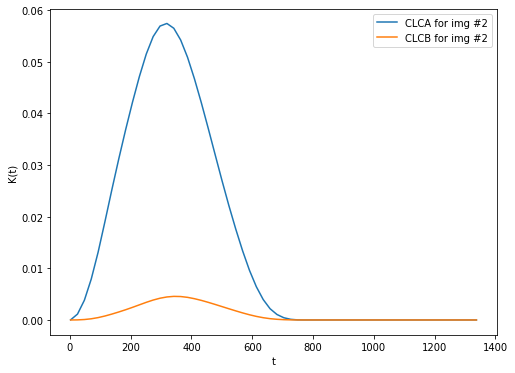

Image #2


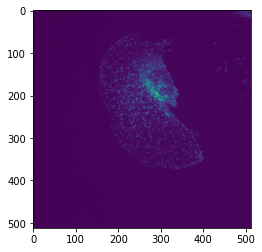

In [26]:
# specify how many std the error envelope spans
n_std = 1

# compare to K values from one discrete image

plt.figure(figsize=(8,6))


#plt.title(f"Average over K values, {n_std} std error envelope")
#plt.plot(range_of_t, clca_mean, label="Average of CLCA")
#plt.fill_between(range_of_t, clca_mean-clca_std*n_std ,clca_mean+clca_std*n_std, alpha=0.3)
#plt.plot(range_of_t, clcb_mean, label="Average of CLCB")
#plt.fill_between(range_of_t, clcb_mean-clcb_std*n_std ,clcb_mean+clcb_std*n_std, alpha=0.3)

#plt.plot(range_of_t[:2], clca_mean[:2], label="Average of CLCA")
#plt.fill_between(range_of_t[:2], clca_mean[:2]-clca_std[:2]*n_std ,clca_mean[:2]+clca_std[:2]*n_std, alpha=0.3)
#plt.plot(range_of_t[:2], clcb_mean[:2], label="Average of CLCB")
#plt.fill_between(range_of_t[:2], clcb_mean[:2]-clcb_std[:2]*n_std ,clcb_mean[:2]+clcb_std[:2]*n_std, alpha=0.3)



#for image_nr in range(7):
image_nr = 1

clca_img = Ks_clca[image_nr,:] #- Ks_csr[image_nr,:]
clcb_img = Ks_clcb[image_nr,:] #- Ks_csr[image_nr,:]

if not image_nr is None:
    area_ratio = area_ratios[image_nr]
    plt.plot(range_of_t/area_ratio, clca_img, label=f"CLCA for img #{image_nr+1}")
    plt.plot(range_of_t/area_ratio, clcb_img, label=f"CLCB for img #{image_nr+1}")

#plt.plot(range_of_t, csr_mean, label="Average of CSR")
#plt.fill_between(range_of_t, csr_mean-csr_std ,csr_mean+csr_std, alpha=0.3)

plt.xlabel("t")
plt.ylabel("K(t)")
plt.legend()
plt.savefig("K_values_mean.pdf")
plt.show()

n_all_rejected = np.sum(test_results_1perc) + np.sum(test_results_5perc) + np.sum(test_results_10perc)
if n_all_rejected == 0:
    print("KS test was not able to detect significant difference at any level!")

if not image_nr is None:
    img = images_clca[image_nr]

    print(f"Image #{image_nr+1}")
    plt.imshow(img)
    plt.show()

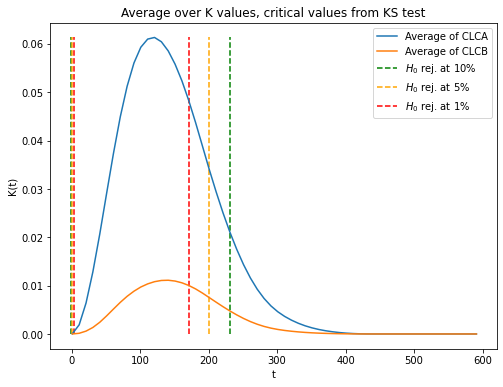

Check error zones:
[  1  11  21  31  41 111 121 131 141 151 161 171]
[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201]
[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231]


In [14]:
plt.figure(figsize=(8,6))
plt.title("Average over K values, critical values from KS test")
plt.plot(range_of_t, clca_mean, label="Average of CLCA")
#plt.fill_between(range_of_t, clca_diff_mean-clca_diff_std ,clca_diff_mean+clca_diff_std, alpha=0.3)
plt.plot(range_of_t, clcb_mean, label="Average of CLCB")
#plt.fill_between(range_of_t, clcb_diff_mean-clcb_diff_std ,clcb_diff_mean+clca_diff_std, alpha=0.3)


vals = [0,0,0]
vals[0] = range_of_t[test_results_10perc][-1]
vals[1] = range_of_t[test_results_5perc][-1]
vals[2] = range_of_t[test_results_1perc][-1]

vals2 = [0,0,0]
vals2[0] = range_of_t[test_results_10perc][0]-2.5
vals2[1] = range_of_t[test_results_5perc][0]
vals2[2] = range_of_t[test_results_1perc][0]+2.5

significance_threshs = zip(vals, ["10%", "5%", "1%"], ["green", "orange", "red"])
for thresh, alpha, color in significance_threshs:
    plt.vlines(thresh, ymin=0, ymax=np.max(clca_mean), linestyles='dashed', label=f"$H_0$ rej. at {alpha}", color=color)
significance_threshs2 = zip(vals2, ["10%", "5%", "1%"], ["green", "orange", "red"])
for thresh, alpha, color in significance_threshs2:
    plt.vlines(thresh, ymin=0, ymax=np.max(clca_mean), linestyles='dashed', color=color)

plt.xlabel("t")
plt.ylabel("K(t)")
plt.legend()
plt.savefig("K_values_mean_KS.pdf")
plt.show()

print("Check error zones:")
print(range_of_t[test_results_1perc])
print(range_of_t[test_results_5perc])
print(range_of_t[test_results_10perc])

### Analysis of the eCDFs

H_0 rejected at level 0.01


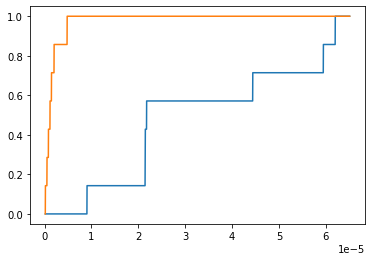

CLCA: [6.19729743e-05 2.17103513e-05 9.01532211e-06 2.14465626e-05
 2.14204030e-05 4.43524625e-05 5.94301027e-05]
CLCB: [4.78422776e-06 1.38557198e-07 1.43996237e-06 7.67840134e-07
 4.65482239e-07 1.10795918e-06 1.97587807e-06]

Max diff: 1.0
D_0.01: 0.8700014258237937


In [16]:
t = 0
clca_data = Ks_clca[:,t]
clcb_data = Ks_clcb[:,t]

alpha = 0.01

is_rej, X1, F1, F2 = KS_2sample_test(clca_data, clcb_data, alpha, printout=True)

plt.plot(X1, F1)
plt.plot(X1, F2)
plt.show()

print("CLCA:", clca_data)
print("CLCB:", clcb_data)
print("\nMax diff:", np.max(abs(F1-F2)))

n = len(clca_data)
m = len(clcb_data)
c = np.sqrt(-np.log(alpha/2) * 1/2)
# value to compare to test statistic
D_alpha = c * np.sqrt((n+m)/(n*m))

print(f"D_{alpha}:", D_alpha)

**Note:** 
- only looking at std does not (or only a bit?) give any information about CDF/eCDF
- eCDFs could be faulty due to small sample size

In [87]:
F2

array([0.        , 0.14285714, 0.14285714, ..., 1.        , 1.        ,
       1.        ])

In [484]:
alpha = 0.01
c = np.sqrt(-np.log(alpha/2) * 1/2)
print(c)

1.6276236307187293
